In [1]:
%matplotlib inline
%matplotlib notebook

import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

from DQN import DQN
from EpsilonGreedyStrategy import EpsilonGreedyStrategy
from Experience import Experience
from ReplayMemory import ReplayMemory
from CartPoleEnvManager import CartPoleEnvManager
from Agent import Agent



In [3]:
env = gym.make('CartPole-v0')
env.reset()
done = False

for _ in range(100):
    env.render()
    if done == True:           
        env.reset()
    #new_state, reward, done, info = env.step(env.action_space.sample())
    _, _, done, _ = env.step(env.action_space.sample())
    
env.close()

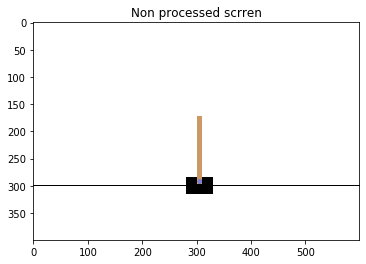

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
em = CartPoleEnvManager(device)
em.reset()
screen = em.render('rgb_array')

plt.figure()
plt.imshow(screen)
plt.title('Non processed scrren')
plt.show()



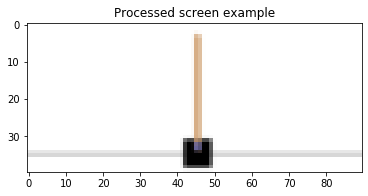

In [3]:
screen = em.get_processed_screen()

plt.figure()
plt.imshow(screen.squeeze(0).permute(1, 2, 0).cpu(), interpolation='none')
plt.title('Processed screen example')
plt.show()